In [ ]:
# 1번 : Dataset Load
# 데이터셋 로드
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

# 제공되는 iris 데이터 주요 정보 출력
print(f"keys of iris dataset = {iris.keys()}")
print(f"iris dataset filename: {iris['filename']}")
print(f"feature names: {iris['feature_names']}")
print(f"target names: {iris['target_names']}")

# 제공되는 iris 데이터를 df_iris 변수에 DataFrame으로 변환
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)
df_iris['target'] = iris.target
df_iris['target'] = df_iris['target'].map({0:"setosa", 1:"versicolor", 2: "virginica"})
df_iris['target_name'] = iris.target

# df_iris 출력
display(df_iris)

#df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names']).assign(target=iris['target'])
#target_converter = {idx:target for idx, target in enumerate(iris['target_names'])}
#df_iris['target_name'] = df_iris.target.map(target_converter)


keys of iris dataset = dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris dataset filename: /usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
# 2번 : Decision Tree

# DecisionTree 학습을 위한 라이브러리 로드
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

random_state=0
accs = []
for i in range(12):
    X_train, X_test, y_train, y_test = train_test_split(df_iris[iris.feature_names] ,iris.target,test_size =0.3,random_state= i*10)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accs.append(acc)
    
print(f"accuracies = {accs}")
print(f"avg. accuracy = {np.mean(accs):0.3f}")

#-------------------------------------------------------
# DecisionTree 학습을 위한 라이브러리 로드
# 12가지의 random_state를 이용하여 12가지의 다른 train-test set에 대해 학습하고, acc 저장
accs = []
for state in range(0, 111, 10):
  X_train, X_test, y_train, y_test = train_test_split(df_iris.drop(['target', 'target_name'], axis=1), df_iris['target'], test_size=0.3, random_state=state)
  clf = DecisionTreeClassifier(random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  accs.append(acc)

accuracies = [0.9777777777777777, 0.9777777777777777, 0.8888888888888888, 0.9555555555555556, 1.0, 0.9555555555555556, 0.9333333333333333, 0.9777777777777777, 0.9333333333333333, 0.9777777777777777, 0.9555555555555556, 0.9333333333333333]
avg. accuracy = 0.956


feature importances of random_state: 0 = [0.02150464 0.02150464 0.90006666 0.05692405]
feature importances of random_state: 10 = [0.         0.01429739 0.56078772 0.42491489]
feature importances of random_state: 20 = [0.01908397 0.         0.52381097 0.45710506]
feature importances of random_state: 30 = [0.01216724 0.03344253 0.55042409 0.40396613]
feature importances of random_state: 40 = [0.         0.0214344  0.88647074 0.09209486]
feature importances of random_state: 50 = [0.02144608 0.02144608 0.5709656  0.38614224]
feature importances of random_state: 60 = [0.00477099 0.03339695 0.52149443 0.44033763]
feature importances of random_state: 70 = [0.04676437 0.         0.5611016  0.39213403]
feature importances of random_state: 80 = [0.         0.         0.95148758 0.04851242]
feature importances of random_state: 90 = [0.         0.01440724 0.56923442 0.41635834]
feature importances of random_state: 100 = [0.02150464 0.02150464 0.56043621 0.3965545 ]
feature importances of random_st

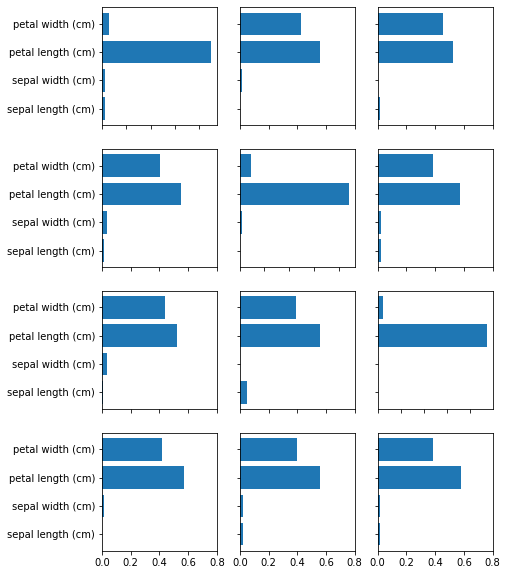

In [ ]:
# 3번 : Feature Importance
import matplotlib.pyplot as plt

imps = []
for state in range(0, 111, 10):
    X_train, X_test, y_train, y_test = train_test_split(df_iris[iris.feature_names] ,iris.target,test_size =0.3,random_state= state)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train,y_train)
    feature_importances = clf.feature_importances_
    print('feature importances of random_state:',state,'=',feature_importances)
    
fig, axs = plt.subplots(4, 3, figsize=(7,10))
for idx, state in enumerate(range(0, 111, 10)):
  X_train, X_test, y_train, y_test = train_test_split(df_iris.drop(['target', 'target_name'], axis=1), df_iris['target'], test_size=0.3, random_state=state)
  clf = DecisionTreeClassifier(random_state=42)
  clf.fit(X_train, y_train)
  print(f"feature importances of random_state: {state} = {clf.feature_importances_}")
  
  ax = axs[idx//3, idx%3]
  ax.barh(iris['feature_names'], clf.feature_importances_) 
  ax.set_xticks(np.arange(0,1,.2)) # yticks 설정
  if idx%3!=0: # 가장 좌측의 그래프만 y label을 달아줌
    ax.set_yticklabels([])
  if idx//3!=3: # 가장 하단의 그래프만 x label을 달아줌
    ax.set_xticklabels([]) 
plt.show()                

In [ ]:
# 4번 : Optimization (1)

from sklearn.model_selection import GridSearchCV
import time
iris_X = df_iris[iris.feature_names] 
iris_y = iris.target
X_trn, X_test, y_trn, y_test = train_test_split(iris_X, iris_y, test_size=0.3, 
                                                random_state=110)
clf = DecisionTreeClassifier()

# Grid Search를 위한 hyper-parameter 조합 세팅
pars = {"max_depth": [1, 2, 3, 4], 
        "min_samples_split":[2, 3, 4], 
        "random_state": list(range(100))}

# 최적 모델 탐색 및 실행시간 측정
time_start = time.time()
gcv = GridSearchCV(clf, pars)
gcv.fit(X_trn,y_trn)
time_end = time.time()

# 결과 출력
print(f"GridSearchCV time = {time_end - time_start} sec.")
print(f"number of grid searches = {len(gcv.cv_results_['mean_test_score'])}")
print(f"best grid search cv score = {gcv.best_score_}")
print(f"best grid search cv parameters = {gcv.best_params_}")
print(f"prediction by best grid search cv parameters = {accuracy_score(y_test, gcv.best_estimator_.predict(X_test))}")

GridSearchCV time = 16.649065494537354 sec.
number of grid searches = 1200
best grid search cv score = 0.9428571428571428
best grid search cv parameters = {'max_depth': 2, 'min_samples_split': 2, 'random_state': 0}
prediction by best grid search cv parameters = 0.9333333333333333


In [ ]:
# 5번 : Optimization (2)
# GridSearchCV는 꼼꼼하게 탐색하지만 시간이 많이 걸린다는 단점이 있습니다.
# 앞서 예제 모델은 매우 간단함에도 불구하고 수 초가 걸렸습니다. 모델이 복잡하고 하이퍼파라미터가 많아지면 몇 시간, 며칠이 걸릴 지도 모릅니다.

from sklearn.model_selection import RandomizedSearchCV
import scipy.stats.distributions as dists

# GridSearchCV와 같은 범위를 dists 함수로 생성
pars = {"max_depth": dists.randint(1, 4 + 1), 
        "min_samples_split":dists.randint(2, 4 + 1), 
        "random_state": dists.randint(0, 100)}

time_start = time.time()
rcv = RandomizedSearchCV(clf, pars)
rcv.fit(X_trn,y_trn)
time_end = time.time()

# 결과 출력
print(f"RandomizedSearchCV time = {time_end - time_start} sec.")
print(f"number of randomzed searches = {len(rcv.cv_results_['mean_test_score'])}")
print(f"best randomzed search cv score = {rcv.best_score_}")
print(f"best randomzed search cv parameters = {rcv.best_params_}")
print(f"prediction by best randomzed search cv parameters = {accuracy_score(y_test, rcv.best_estimator_.predict(X_test))}")

RandomizedSearchCV time = 0.7258400917053223 sec.
number of randomzed searches = 10
best randomzed search cv score = 0.9428571428571428
best randomzed search cv parameters = {'max_depth': 2, 'min_samples_split': 4, 'random_state': 42}
prediction by best randomzed search cv parameters = 0.0


accuracy(train) = 0.8571428571428571
accuracy(test) = 0.8333333333333334
TN=2, FP=1, FN=0, TP=3


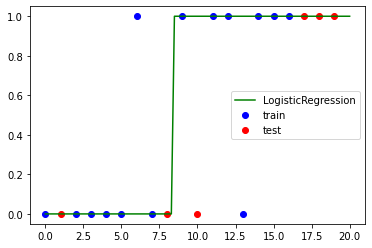

In [ ]:
# 6번 : Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 예제 데이터 생성
X = np.arange(0, 20)
Y = [0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1]
X_trn, X_test, y_trn, y_test = train_test_split(X.reshape(-1, 1), Y, 
                                                test_size=0.3, 
                                                random_state=0)
# Logistic Regression 학습
clf = LogisticRegression()
clf.fit(X_trn, y_trn)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

#y_test = np.array(y_test) # for vctorization
#TP = sum(pred * y_test)
#FP = sum(pred * (1-y_test))
#TN = sum((1-pred) * y_test)
#FN = sum((1-pred) * (1-y_test))

# 학습 결과 시각화
x_line = np.linspace(0,20,100)
y_line = clf.predict(x_line.reshape(-1, 1))
fig, ax = plt.subplots()
ax.plot(x_line, y_line, c="g", label="LogisticRegression")
ax.scatter(X_trn, y_trn, c="b", label="train")
ax.scatter(X_test, y_test, c="r", label="test")
ax.legend()
plt.savefig("logistic_regression.png")
y_trn_pred = clf.predict(X_trn)
print(f"accuracy(train) = {accuracy_score(y_trn, y_trn_pred)}")
print(f"accuracy(test) = {accuracy_score(y_test, pred)}")
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")


이진 분류에서 decision_function 반환값의 크기는 (n_samples,)이며 각 샘플이 하나의 실수 값을 반환합니다.



versicolor prediction: TN=26, FP=1, FN=15, TP=3
precision P = TP/(TP+FP) = 3/3+1 = 0.75
recall R = TP/(TP+FN) = 3/3+15 = 0.17
f1 = 2PR/(P+R) = 2*0.75*0.17/(0.75+0.17) = 0.27

confidence of prediction (first 5) : [-0.959  0.849 -3.336 -0.203 -1.719]
X_test data index, supposed to be y=1: [ 1 10 17 28]


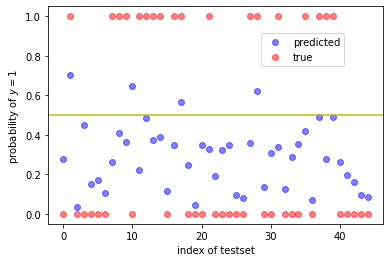

In [ ]:
# 7번 : Binary Classification - Metric (1)
# 데이터 수정 및 모델 평가를 위한 라이브러리 로드 
# sklearn 0.23.2
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
iris = load_iris()
iris_X = iris["data"]
iris_y = iris["target"]
iris_yb = label_binarize(iris_y, classes = [1])
X_trn, X_test, y_trn, y_test = train_test_split(iris_X, iris_yb.flatten(), 
                                                test_size=0.3, 
                                                random_state=0)

# Logistic Regression을 통한 모델 학습
clf = LogisticRegression()
clf.fit(X_trn, y_trn)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
prec = TP/(TP+FP)
recall = TP / (TP+FN)
y_score = clf.decision_function(X_test)

# 결과 시각화
print(f"{iris['target_names'][1]} prediction: TN={TN}, FP={FP}, FN={FN}, TP={TP}")
print(f"precision P = TP/(TP+FP) = {TP}/{TP}+{FP} = {prec:.2f}")
print(f"recall R = TP/(TP+FN) = {TP}/{TP}+{FN} = {recall:.2f}")
print(f"f1 = 2PR/(P+R) = 2*{prec:.2f}*{recall:.2f}/({prec:.2f}+{recall:.2f}) = {(2*prec*recall/(prec+recall)):.2f}")
print(f"\nconfidence of prediction (first 5) : {y_score[:5]}")
print(f"X_test data index, supposed to be y=1: {np.where(y_score > 0)[0]}")
pred_proba_1 = clf.predict_proba(X_test)[:, 1]
idx_data = np.arange(len(pred_proba_1))
fig, ax = plt.subplots()
ax.scatter(idx_data, pred_proba_1, c="b", label="predicted", alpha=0.5)
ax.scatter(idx_data, y_test, c="r", label="true", alpha=0.5)
ax.set_xlabel("index of testset")
ax.set_ylabel("probability of $y = 1$")
ax.axhline(0.5, c="y")
ax.legend(bbox_to_anchor=(0.9, 0.9))
plt.savefig('파일 이름')


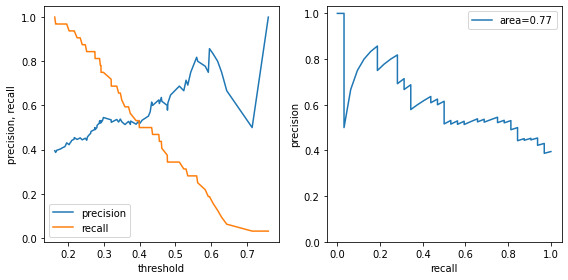

In [ ]:
# 8번 : Binary Classification - Metric (2)
#기존 이진 분류 모델은 0.5를 기준으로 0과 1을 판단하였습니다. 이 기준을 threshold라고 하는데, 
#threshold를 바꾸게 되면 분류 모델의 성능에 큰 영향을 줍니다.

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Logistic Regression으로 학습
p,r,t = precision_recall_curve(y_trn,clf.predict_proba(X_trn)[:, 1])
y_score = clf.decision_function(X_test)
avg_p = average_precision_score(y_test,y_score)

# 결과 시각화
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
axs[0].plot(t, p[:t.shape[0]], label="precision")
axs[0].plot(t, r[:t.shape[0]], label="recall")
axs[0].set_xlabel("threshold")
axs[0].set_ylabel("precision, recall")
axs[0].legend()
axs[1].plot(r, p, label=f"area={avg_p:.2f}")
axs[1].set_ylim(0, )
axs[1].set_xlabel("recall")
axs[1].set_ylabel("precision")
axs[1].legend()
fig.tight_layout()
plt.savefig('파일 이름')
# 예측된 판별 확률을 그림으로 나타냅니다.


#
#pred_prob = clf.predict_proba(X_test)[:, 0]
#t = np.arange(0.2, 0.71, 0.1)
#p = [precision_score(y_test, pred_prob>threshold) for threshold in t]
#r = [recall_score(y_test, pred_prob>threshold) for threshold in t]
#avg_p = np.mean(p)

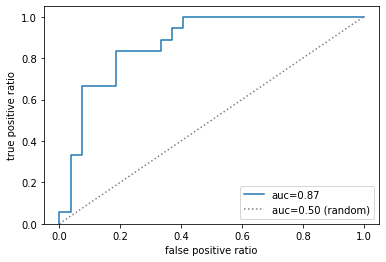

In [ ]:
# 9번 : Binary Classification - Metric (3)

# ROC, AUC 라이브러리 로드
# sklearn 0.23.2
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Logistic Regression 학습
fpr,tpr,t = roc_curve(y_test,clf.predict_proba(X_test)[:, 1])
auc = auc(fpr, tpr)
'''
code here
	TO-DO 1. FPR, TPR과 여기 대응되는 threshold를 각기 fpr, tpr, t로 저장합니다.
	TO-DO 2. ROC 하단 면적을 auc로 저장합니다.
'''

# 결과 시각화
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label=f"auc={auc:.2f}")
ax.plot([0,1], [0,1], ":", c="gray", label="auc=0.50 (random)")
ax.set_ylim(0, )
ax.set_xlabel("false positive ratio")
ax.set_ylabel("true positive ratio")
ax.legend()
fig.savefig('파일 이름')

accuracy(train) = 0.84
accuracy(test) = 0.00


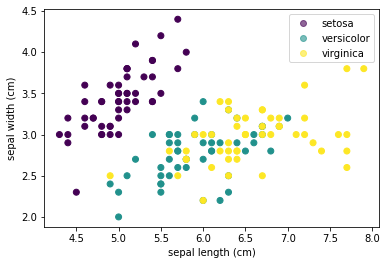

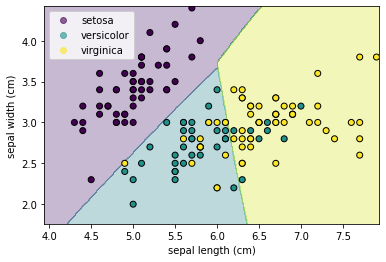

In [ ]:
# 10번 : Support Vector Machine
# 라이브러리 로드 및 데이터 전처리
# sklearn 0.23.2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
iris_X = iris["data"][:,0:2]
iris_y = iris["target"]
X_trn, X_test, y_trn, y_test = train_test_split(iris_X, iris_y, 
                                                test_size=0.3, 
                                                random_state=0)

# 데이터 분포 시각화
fig, ax = plt.subplots()
scatter = plt.scatter(iris_X[:,0], iris_X[:,1], c=iris_y)
ax.set_xlabel(iris["feature_names"][0])
ax.set_ylabel(iris["feature_names"][1])
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
ax.legend(handles, iris["target_names"])
fig.savefig('파일1 이름')

# SVM 학습
clf = svm.SVC()
clf.fit(X_trn,y_trn)

'''
code here
'''

# SVM 분류 결과 시각화
X0, X1 = iris_X[:, 0], iris_X[:, 1]
def gen_meshgrid(X0, X1, clf, ax):
    X0_rng = X0.max()-X0.min()
    X1_rng = X1.max()-X1.min()
    X0_min, X0_max = X0.min() - X0_rng*0.1, X0.max() + X0_rng*0.01
    X1_min, X1_max = X1.min() - X1_rng*0.1, X1.max() + X1_rng*0.01
    XX0, XX1 = np.meshgrid(np.arange(X0_min, X0_max, 0.01),
                           np.arange(X1_min, X1_max, 0.01))
    Z = clf.predict(np.c_[XX0.ravel(), XX1.ravel()])
    Z = Z.reshape(XX0.shape)
    ax.contourf(XX0, XX1, Z, alpha=0.3)
    return ax

fig, ax = plt.subplots()
ax = gen_meshgrid(X0, X1, clf, ax)
scatter = ax.scatter(iris_X[:,0], iris_X[:,1], c=iris_y, ec="k")
ax.set_xlabel(iris["feature_names"][0])
ax.set_ylabel(iris["feature_names"][1])
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
ax.legend(handles, iris["target_names"])
plt.savefig("파일2 이름")

# 결과출력
print(f"accuracy(train) = {accuracy_score(y_trn, clf.predict(X_trn)):.02f}")
print(f"accuracy(test) = {accuracy_score(y_test, y_pred):.02f}")

micro average는 전체 평균, macro average는 레이블별 합의 평균입니다.


In [ ]:
# 11번 : Multiclass Classification - Metric (1)
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import pandas as pd

# 각 레이블별로 이진화
iris_yb = label_binarize(iris_y, classes=[0, 1, 2])
X_trn, X_test, y_trn, y_test = train_test_split(iris_X, iris_yb, 
                                                test_size=0.3, 
                                                random_state=0)

# 정확도. micro 평균과 macro 평균을 dictionary로 저장합니다.
accs = {}
# Precision, Recall, F1 score 평균값을 데이터프레임으로 저장합니다.
df_metric = pd.DataFrame()
# 레이블별 threshold에 따른 정확도, 재현율, threshold입니다.
ps, rs, ts = {precision_recall_curve(y_test,clf.predict_proba(X_test)[:, 1])}

# OneVSRestClassifier로 학습
clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
clf.fit(X_trn, y_trn) 
'''
code here
'''

# 결과 출력
print(f"# accuracy = {acc:.2f}")
for i in range(3):
    print(f"  accuracy of class {i} = {accs[i]:.2f}")
display(df_metric)

fig, ax = plt.subplots()
ax.plot(rs["micro"], ps["micro"], c="k", lw=3, alpha=0.5,
        label=f"micro-average: area={avg_ps['micro']:.2f}")    
for i in range(3):
    ax.plot(rs[i], ps[i], 
            label=f"{iris['target_names'][i]}: area={avg_ps[i]:.2f}")
ax.set_ylim(0, )    
ax.set_xlabel("recall")
ax.set_ylabel("precision")
ax.legend()    
fig.savefig('파일 이름')

NotFittedError: ignored

# accuracy = 0.93
 accuracy of class 0 = 0.64
 accuracy of class 1 = 0.60
 accuracy of class 2 = 0.76


Mean of empty slice.
invalid value encountered in double_scalars
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


""


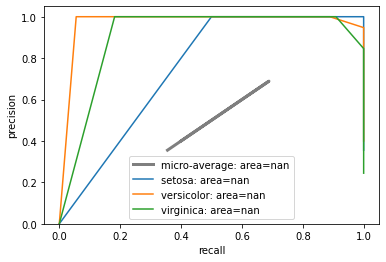

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.preprocessing import label_binarize

from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score

import pandas as pd



# 각 레이블별로 이진화

iris_yb = label_binarize(iris_y, classes=[0, 1, 2])

X_trn, X_test, y_trn, y_test = train_test_split(iris_X, iris_yb, 

                        test_size=0.3, 

                        random_state=0)



# 정확도. micro 평균과 macro 평균을 dictionary로 저장합니다.

accs = {}

# Precision, Recall, F1 score 평균값을 데이터프레임으로 저장합니다.

df_metric = pd.DataFrame()

# 레이블별 threshold에 따른 정확도, 재현율, threshold입니다.

ps, rs, ts = {}, {}, {}

for acc_measure in list(range(3)) + ['micro', 'macro']:

  ps[acc_measure] = []

  rs[acc_measure] = []

  ts[acc_measure] = []



# OneVSRestClassifier로 학습

clf = OneVsRestClassifier(LogisticRegression()).fit(X_trn, y_trn)
pred_prob = clf.predict_proba(X_test)
pred = np.argmax(pred_prob, axis=1)
true = np.argmax(y_test, axis=1)

pred = (true == pred).sum()
for i in range(3):
  accs[i] = (((true==i) * (pred==i)).sum() + ((true!=i) * (pred!=i)).sum()) / len(true)

avg_ps = {}
for k, v in ps.items():
  avg_ps[k] = np.mean(ps[k])

pred_prob_norm = pred_prob / pred_prob.sum(axis=1).reshape(len(pred_prob), 1)
for t in np.arange(0, 1.1, 0.1):
  for i in range(3):
    pred = pred_prob_norm[:,i] > t
    ps[i].append(precision_score(y_test[:, i], pred))
    rs[i].append(recall_score(y_test[:, i], pred))
  ps['micro'].append(precision_score(np.argmax(y_test, axis=1), pred, average='micro'))
  ps['macro'].append(precision_score(np.argmax(y_test, axis=1), pred, average='macro'))
  rs['micro'].append(recall_score(np.argmax(y_test, axis=1), pred, average='micro'))
  rs['macro'].append(recall_score(np.argmax(y_test, axis=1), pred, average='macro'))

# 결과 출력
print(f"# accuracy = {acc:.2f}")
for i in range(3):
  print(f" accuracy of class {i} = {accs[i]:.2f}")
display(df_metric)

fig, ax = plt.subplots()
ax.plot(rs["micro"], ps["micro"], c="k", lw=3, alpha=0.5,
    label=f"micro-average: area={avg_ps['micro']:.2f}")   
for i in range(3):
  ax.plot(rs[i], ps[i], 
      label=f"{iris['target_names'][i]}: area={avg_ps[i]:.2f}")
ax.set_ylim(0, )   
ax.set_xlabel("recall")
ax.set_ylabel("precision")
ax.legend()   
plt.show()

In [ ]:
# 12번 : Multiclass Classification - Metric (2)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
iris_yb = label_binarize(iris_y, classes=[0, 1, 2])
X_trn, X_test, y_trn, y_test = train_test_split(iris_X, iris_yb, 
                                                test_size=0.3, 
                                                random_state=0)

fprs, tprs, ts = {}, {}, {} 
aucs = {}

# 모델 학습
'''
code here
'''

# 결과 시각화
fig, ax = plt.subplots()
ax.plot(fprs["micro"], tprs["micro"], c="k", lw=3,
        label=f"micro-average: AUC={aucs['micro']:.2f}")    
for i in range(3):
    ax.plot(fprs[i], tprs[i], alpha=0.5, 
            label=f"{iris['target_names'][i]}: AUC={aucs[i]:.2f}")
ax.plot([0,1], [0,1], ":", c="gray", label="auc=0.50 (random)")
ax.set_ylim(0, )    
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()  
fig.savefig('파일 이름')

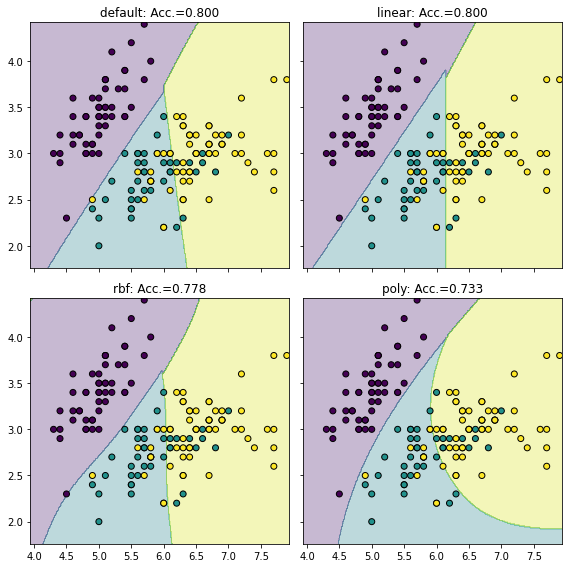

In [46]:
# 13번 : Kernel

# code from 10번

# SVM 학습 세팅
C = 1
clfs = [svm.SVC(), svm.SVC(kernel='linear', C=C), svm.SVC(kernel='rbf', gamma=1, C=C), svm.SVC(kernel='poly', degree=5, gamma='auto', C=C)]
titles = ["default", "linear", "rbf", "poly"]
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8),
                         sharex=True, sharey=True)
axs = axes.ravel()

# 지정된 kernel별 학습 및 결과 시각화
for i, (ax, title, clf) in enumerate(zip(axs, titles, clfs)):
    X0, X1 = iris_X[:, 0], iris_X[:, 1]
    model = clfs[i].fit(X_trn,y_trn)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, model.predict(X_test))
    
    ax = gen_meshgrid(X0, X1, clf, ax)
    ax.scatter(iris_X[:,0], iris_X[:,1], c=iris_y, ec="k")
    ax.set_title(f"{title}: Acc.={acc:.03f}")

fig.tight_layout()
fig.savefig('파일 이름')


In [65]:
# 14번 : Random Forest Classifier

# Random Forest 학습을 위한 라이브러리 로드
# sklearn 0.23.2
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Wine dataset 로드
wine = load_wine()
wine_X = wine["data"]
wine_y = wine["target"]
X_trn, X_test, y_trn, y_test = train_test_split(wine_X, wine_y, 
                                                test_size=0.3, 
                                                random_state=1000)

# Random Forest Classifier를 이용하여 Wine 데이터 분류
#svm
svm_clf = svm.SVC(probability=True)
svm_clf.fit(X_trn, y_trn)
svm_pred = svm_clf.predict(X_test)
acc_svm = accuracy_score(y_test, svm_pred)
p_svm = precision_score(y_test,svm_pred, average='weighted')
r_svm = recall_score(y_test,svm_pred,average='weighted')
f1_svm = f1_score(y_test,svm_pred,average='weighted')
svm_y = svm_clf.predict_proba(X_test)
auc_svm = roc_auc_score(y_test, svm_y, multi_class='ovr')
#dt
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_trn, y_trn)
dt_pred = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, dt_pred)
p_dt = precision_score(y_test,dt_pred, average='weighted')
r_dt = recall_score(y_test,dt_pred,average='weighted')
f1_dt = f1_score(y_test,dt_pred,average='weighted')
dt_y = dt_clf.predict_proba(X_test)
auc_dt = roc_auc_score(y_test, dt_y, multi_class='ovr')
#rf
rf_clf = RandomForestClassifier()
rf_clf.fit(X_trn, y_trn)
rf_pred = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, rf_pred)
p_rf = precision_score(y_test,rf_pred, average='weighted')
r_rf = recall_score(y_test,rf_pred,average='weighted')
f1_rf = f1_score(y_test,rf_pred,average='weighted')
dt_rf = rf_clf.predict_proba(X_test)
auc_rf = roc_auc_score(y_test, dt_rf, multi_class='ovr')
    
# 모델별 결과 출력
print("# SVM")
print(f"  accuracy  = {acc_svm:0.3f}")
print(f"  precision = {p_svm:0.3f}")
print(f"  recall    = {r_svm:0.3f}")
print(f"  f1        = {f1_svm:0.3f}")
print(f"  auc       = {auc_svm:0.3f}")
print("# Decision Tree")
print(f"  accuracy  = {acc_dt:0.3f}")
print(f"  precision = {p_dt:0.3f}")
print(f"  recall    = {r_dt:0.3f}")
print(f"  f1        = {f1_dt:0.3f}")
print(f"  auc       = {auc_dt:0.3f}")
print("# Random Forest")
print(f"  accuracy  = {acc_rf:0.3f}")
print(f"  precision = {p_rf:0.3f}")
print(f"  recall    = {r_rf:0.3f}")
print(f"  f1        = {f1_rf:0.3f}")
print(f"  auc       = {auc_rf:0.3f}")


# SVM
  accuracy  = 0.722
  precision = 0.717
  recall    = 0.722
  f1        = 0.718
  auc       = 0.874
# Decision Tree
  accuracy  = 0.889
  precision = 0.900
  recall    = 0.889
  f1        = 0.889
  auc       = 0.919
# Random Forest
  accuracy  = 0.963
  precision = 0.967
  recall    = 0.963
  f1        = 0.963
  auc       = 1.000


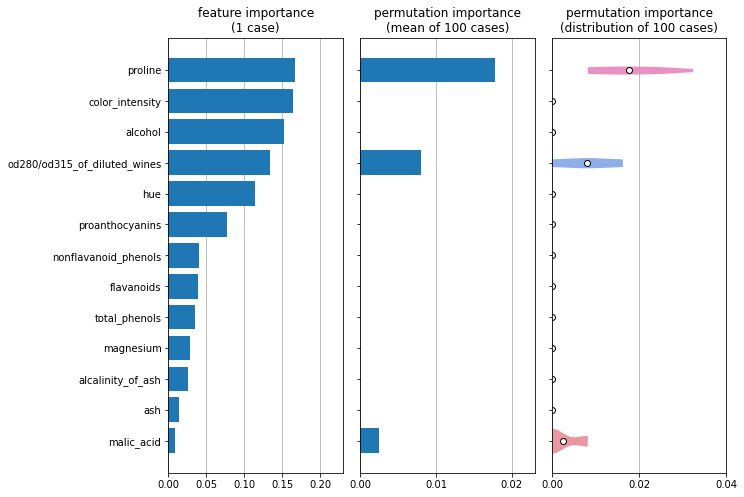

In [140]:
# 15번 : Permutation Importance
# code from 14번

# 순열 중요도를 사용하기 위한 라이브러리 로드
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pi_sorted = permutation_importance(rf_clf, X_trn,y_trn, n_repeats=10,random_state=42).importances
importance_sorted_idx = np.argsort(rf_clf.feature_importances_)

fi_sorted =  rf_clf.feature_importances_[importance_sorted_idx]
pi_mean_sorted = permutation_importance(rf_clf, X_trn,y_trn, n_repeats=10,random_state=42).importances_mean

perm_sorted_idx = permutation_importance(rf_clf, X_trn,y_trn, n_repeats=10,random_state=42).importances_mean.argsort()
feature_sorted = np.array(wine.feature_names)[perm_sorted_idx]

# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(10, 8), sharey=True)
axs[0].barh(feature_sorted, fi_sorted, zorder=2)
axs[0].set_xticks(np.arange(0, 0.25, 0.05))
axs[0].set_xlim(0, 0.23)
axs[0].grid(axis="x")
axs[0].set_title("feature importance\n(1 case)")
axs[1].barh(feature_sorted, pi_mean_sorted, zorder=2)
axs[1].set_xticks(np.arange(0, 0.05, 0.01))
axs[1].set_xlim(0, 0.023)
axs[1].grid(axis="x", zorder=0)
axs[1].set_title("permutation importance\n(mean of 100 cases)")
sns.violinplot(data=pi_sorted.T, orient="horizontal", 
               linewidth=0, cut=0, ax=axs[2], zorder=2)
axs[2].scatter(pi_mean_sorted, feature_sorted, c="w", ec="k")
axs[2].set_xticks(np.arange(0, 0.08, 0.02))
axs[2].set_xlim(0, 0.04)
axs[2].grid(axis="x", zorder=0)
axs[2].set_title("permutation importance\n(distribution of 100 cases)")
axs[0].invert_yaxis()
axs[0].set_yticklabels(feature_sorted)
fig.subplots_adjust(wspace=0.1)
fig.savefig('파일 이름')